In [1]:
import numpy as np

In [30]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression:
    
    def __init__(self, lr=0.001, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.bias = None
        self.weights = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights, self.bias = np.zeros(n_features), 0
        
        for _ in range(self.n_iter):
            
            pred_linear = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(pred_linear)
            
            dw = (2/n_samples)*np.dot(X.T, (y_pred-y))
            db = (2/n_samples)*np.sum(y_pred-y)
            
            self.weights = self.weights - dw*self.lr
            self.bias = self.bias - db*self.lr
        
    def predict(self, X):
        pred_linear = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(pred_linear)
        return [0 if y<0.5 else 1 for y in y_pred]

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [32]:
dataset = datasets.load_breast_cancer()
X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [33]:
clf = LogisticRegression(lr=0.1)

In [34]:
clf.fit(X_train, y_train)

C:\Users\abhis\AppData\Local\Temp\ipykernel_10492\3164346241.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


In [35]:
predictions = clf.predict(X_test)

C:\Users\abhis\AppData\Local\Temp\ipykernel_10492\3164346241.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


In [36]:
def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test)/len(y_test)

In [37]:
accuracy(predictions, y_test)

0.9210526315789473

## Testing stuff with dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('datasets/diabetes_prediction_dataset.csv')

In [3]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [57]:
import copy
import matplotlib.pyplot as plt

In [6]:
df = copy.deepcopy(data)

In [7]:
le = LabelEncoder()

In [13]:
df[["gender", "smoking_history"]] = df[["gender", "smoking_history"]].apply(le.fit_transform)

In [32]:
target_column = 'diabetes'
feature_columns = df.columns.to_list()
feature_columns.remove(target_column)
X = df[feature_columns]
y = df[target_column]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)

In [63]:
lr_model = LogisticRegression(solver='sag', max_iter = 4000, random_state=101)

In [64]:
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=4000, random_state=101, solver='sag')

In [65]:
y_pred = lr_model.predict(X_test)

In [66]:
acc = accuracy_score(y_test, y_pred)

In [67]:
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 96.02424242424242


In [68]:
print(classification_report(y_test, y_pred, target_names=['not diabetic', 'diabetic']))

              precision    recall  f1-score   support

not diabetic       0.97      0.99      0.98     30195
    diabetic       0.88      0.62      0.73      2805

    accuracy                           0.96     33000
   macro avg       0.92      0.81      0.85     33000
weighted avg       0.96      0.96      0.96     33000



In [69]:
confusion_matrix(y_test, y_pred, labels=lr_model.classes_)

array([[29951,   244],
       [ 1068,  1737]], dtype=int64)

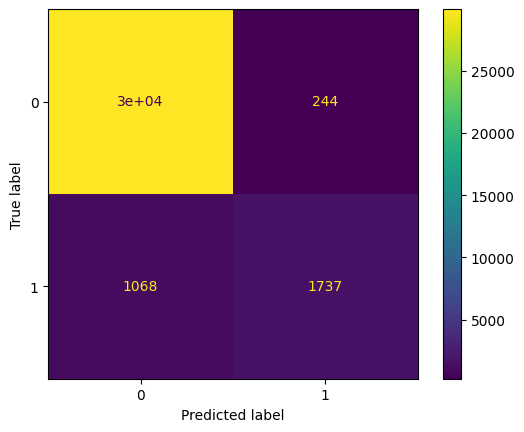

In [70]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()